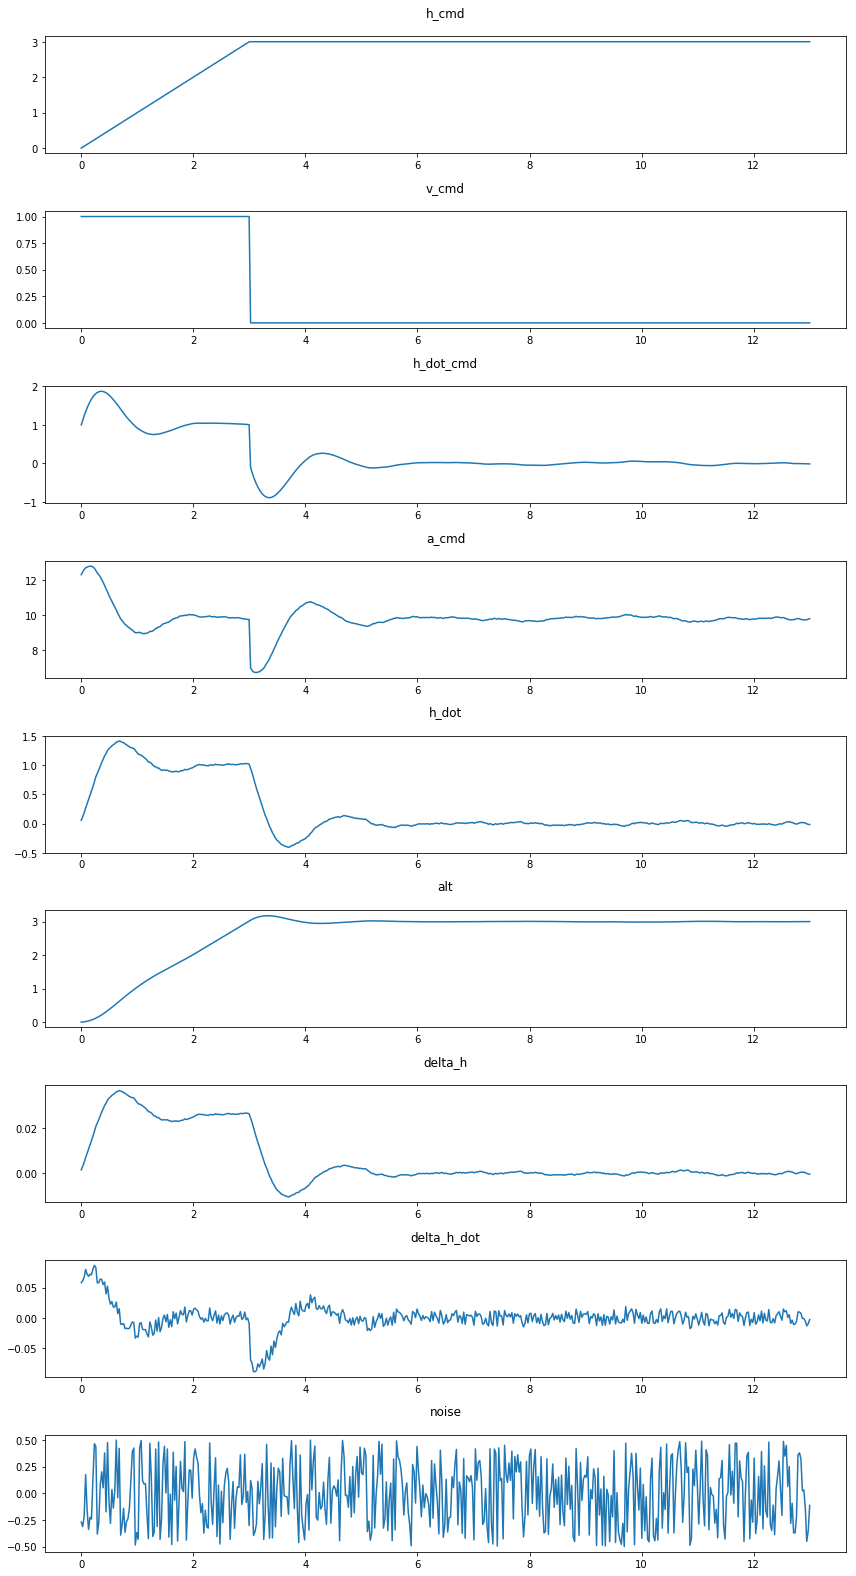

In [88]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 22

takeoff_duration = 3.0
takeoff_to = 3.0

simulation_duration = takeoff_duration + 10.0
simulation_steps = 500

drone_mass = 0.104

alts = []
trace = []

alt = 0.0
kp_alt = 5.0
kp_h_dot = 2.5
h_dot = 0.0

times = np.linspace(0.0, simulation_duration, num = simulation_steps)

for t in times:
    alts.append(alt)

    if t < takeoff_duration:
        h0 = 0.0
        h1 = takeoff_to
        t0 = 0.0
        t1 = takeoff_duration
    else:
        h0 = takeoff_to
        h1 = takeoff_to
        t0 = 0.0
        t1 = 1.0
    # Generate target commands
    h_cmd = h0 + (h1 - h0) * (t - t0) / (t1 - t0)
    v_cmd = (h1 - h0) / (t1 - t0)
    # Altitude controller
    h_dot_cmd = kp_alt * (h_cmd - alt) + v_cmd
    # ^^ TODO clip it to max descent/ascent rates
    a_cmd = 9.81 + kp_h_dot * (h_dot_cmd - h_dot)
    # TODO convert a_cmd to thrust (on a real drone taking attitude in account)
    # clip thrust to 0..MAX_THRUST
    # somehow account for force generated by props
    # Simulate drone
    dt = simulation_duration / (len(times) - 1)
    noise = np.random.uniform(-0.5, 0.5)
    # TODO convert from thrust back to acceleration
    delta_h_dot = ((a_cmd + noise) - 9.81) * dt
    h_dot = h_dot + delta_h_dot
    delta_h = h_dot * dt
    alt = alt + delta_h
    # Append to plot
    trace.append((h_cmd, v_cmd, h_dot_cmd, a_cmd, h_dot, alt, delta_h, delta_h_dot, noise))

trace = np.array(trace)
titles = ["h_cmd", "v_cmd", "h_dot_cmd", "a_cmd", "h_dot", "alt", "delta_h", "delta_h_dot", "noise"]
for i in range(len(trace[0])):
    plt.subplot(100 * len(trace[0]) + 10 + (i + 1))
    plt.plot(times, trace[:, i])
    plt.title(titles[i])
    plt.tight_layout()
